## Descrição do problema e explanção dos dados

#### Extrair comportamentos e padrões dos dados do comportamento do consumidor e hábitos de compra entender suas estruturas e fazer recomendações

1. ID do Cliente: Um identificador exclusivo atribuído a cada cliente individual, facilitando o rastreamento e a análise de seu comportamento de compra ao longo do tempo.
1. Idade: A idade do cliente, fornecendo informações demográficas para segmentação e estratégias de marketing direcionadas.
1. Género: A identificação do género do cliente, uma variável demográfica chave que influencia as preferências de produto e os padrões de compra.
1. Item comprado: O produto ou item específico selecionado pelo cliente durante a transação.
1. Categoria: A classificação ampla ou grupo ao qual pertence o item comprado (por exemplo, roupas, eletrônicos, mantimentos).
1. Valor da compra (USD): O valor monetário da transação, indicado em dólares dos Estados Unidos (USD), indica o custo do(s) item(s) adquirido(s).
1. Localização: A localização geográfica onde a compra foi feita, oferecendo insights sobre preferências regionais e tendências de mercado.
1. Tamanho: A especificação de tamanho (se aplicável) do item adquirido, relevante para vestuário, calçados e determinados bens de consumo.
1. Cor: A variante ou escolha de cor associada ao item adquirido, influenciando as preferências do cliente e a disponibilidade do produto.
1. Estação: A relevância sazonal do item comprado (por exemplo, primavera, verão, outono, inverno), impactando a gestão de estoque e as estratégias de marketing.
1. Avaliação: avaliação numérica ou qualitativa fornecida pelo cliente em relação à sua satisfação com o item adquirido.
1. Status da Assinatura : Indica se o cliente optou por um serviço de assinatura, oferecendo insights sobre seu nível de fidelidade e potencial de receita recorrente.
1. Tipo de Envio: Especifica o método utilizado para entregar o item adquirido (por exemplo, envio padrão, entrega expressa), influenciando os prazos e custos de entrega.
1. Desconto aplicado: indica se algum desconto promocional foi aplicado à compra, esclarecendo a sensibilidade ao preço e a eficácia da promoção.
1. Código promocional utilizado: indica se um código promocional ou cupom foi utilizado durante a transação, auxiliando na avaliação do sucesso da campanha de marketing.
1. Compras Anteriores: Fornece informações sobre a quantidade ou frequência de compras anteriores realizadas pelo cliente, contribuindo para estratégias de segmentação e retenção de clientes.
1. Método de pagamento: especifica o modo de pagamento utilizado pelo cliente (por exemplo, cartão de crédito, dinheiro), oferecendo informações sobre as opções de pagamento preferidas.
1. Frequência de compras: indica a frequência com que o cliente se envolve em atividades de compra, uma métrica crítica para avaliar a fidelidade do cliente e o valor vitalício.

## Análise de Dados Exploratória (*EDA*)

In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer


##### Carregando o conjunto de dados

In [3]:
df_consumo = pd.read_csv('n_supervisionado/dataset/shopping_behavior_updated.csv')
df_consumo.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

##### Excluir colunas relacionadas registros únicos

In [5]:
df_consumo = df_consumo.drop('Customer ID', axis=1)

##### Quantidade de valores únicos por coluna e os valores

In [7]:
for column in df_consumo.columns:
    unique_counts = df_consumo[column].nunique()
    print(f"'{column}' tem {unique_counts} valores únicos")
    unique_values = df_consumo[column].unique()
    if unique_counts > 30:
        print(unique_values[:30])
        print(f"({unique_counts - 30} valores adicionais não exibidos)")
    else:
        print(unique_values)
    print() 

'Age' tem 53 valores únicos
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67]
(23 valores adicionais não exibidos)

'Gender' tem 2 valores únicos
['Male' 'Female']

'Item Purchased' tem 25 valores únicos
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

'Category' tem 4 valores únicos
['Clothing' 'Footwear' 'Outerwear' 'Accessories']

'Purchase Amount (USD)' tem 81 valores únicos
[53 64 73 90 49 20 85 34 97 31 68 72 51 81 36 38 48 62 37 88 22 25 56 94
 79 67 91 33 69 45]
(51 valores adicionais não exibidos)

'Location' tem 50 valores únicos
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California

*Sem valores nulos e sem valores "estranhos"*. Coomo é uma análise de tendencia vamos considerar todas as colunas e dados.

In [11]:
df_consumo.describe().round(2)

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00
mean,44.07,59.76,3.75,25.35
std,15.21,23.69,0.72,14.45
min,18.00,20.00,2.50,1.00
25%,31.00,39.00,3.10,13.00
50%,44.00,60.00,3.70,25.00
75%,57.00,81.00,4.40,38.00
max,70.00,100.00,5.00,50.00


In [12]:
df_consumo.describe(include='O')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


##### Distribuição dos dados- Identificação de Outliers

In [14]:
colunas_num = df_consumo.select_dtypes(include='number')

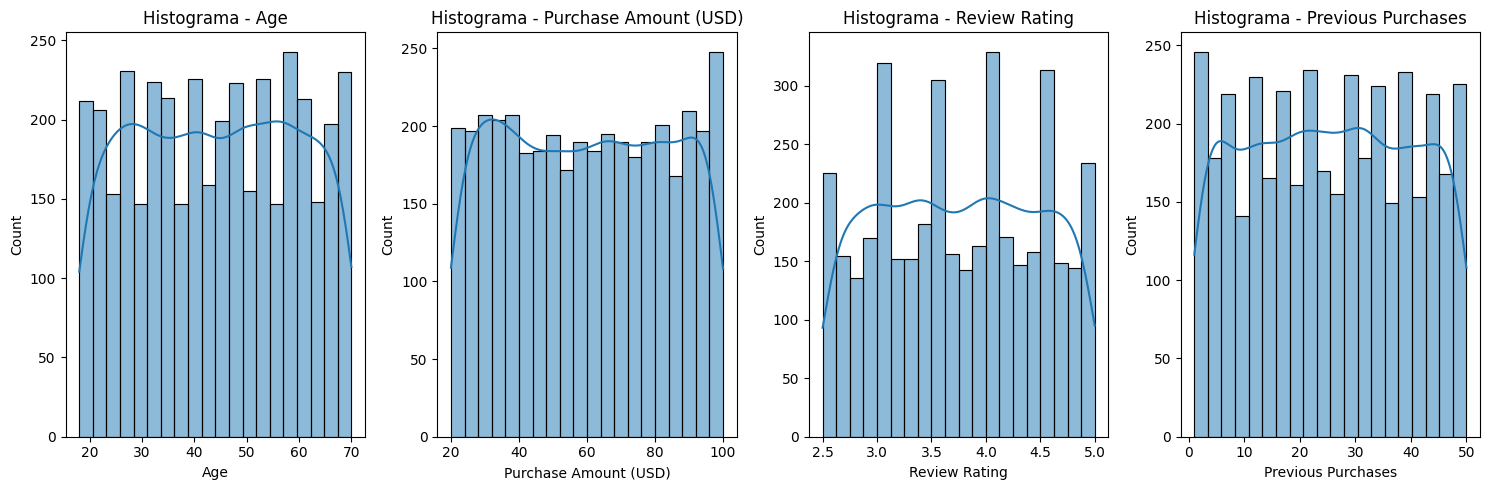

In [27]:
linhas = 1      
colunas = 4
fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

for i, coluna in enumerate(colunas_num):
    sns.histplot(data=df_consumo, x=df_consumo[coluna], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histograma - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [24]:
for coluna in colunas_num:
    mediana = df_consumo[coluna].median()
    media = df_consumo[coluna].mean()
    print(f"Mediana de {coluna} = {mediana}")
    print(f"Media de {coluna} = {media.round(2)}")


Mediana de Age = 44.0
Media de Age = 44.07
Mediana de Purchase Amount (USD) = 60.0
Media de Purchase Amount (USD) = 59.76
Mediana de Review Rating = 3.7
Media de Review Rating = 3.75
Mediana de Previous Purchases = 25.0
Media de Previous Purchases = 25.35


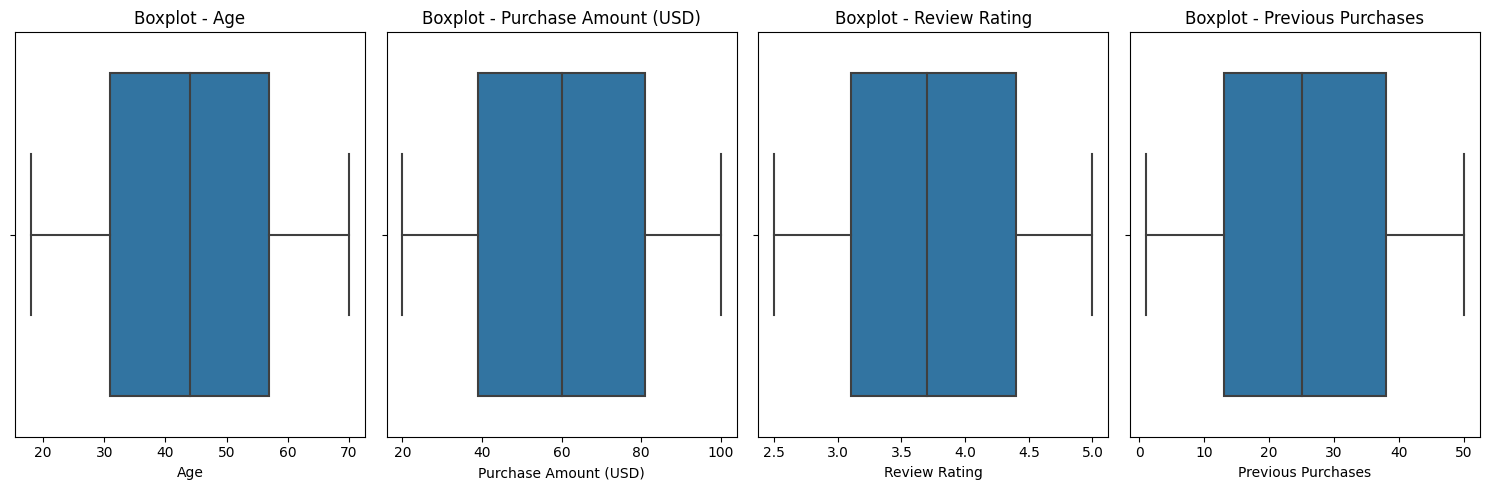

In [25]:
linhas = 1
colunas = 4

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar Boxplot
for i, coluna in enumerate(colunas_num):
    sns.boxplot(data=df_consumo, x=df_consumo[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

*Notamos uma distribuição simétrica das variáveis onde a media e mediana estão bem próximas e sem outliers*

## Pre-processamento 

In [28]:
colunas_numericas = df_consumo.select_dtypes(include='number').columns
colunas_categoricas = df_consumo.select_dtypes(include='O').columns

In [30]:
df_consumo.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [33]:
le = LabelEncoder()
for coluna in colunas_categoricas:
    df_consumo[coluna] = le.fit_transform(df_consumo[coluna])

In [34]:
df_consumo.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


In [41]:
X = df_consumo.values

## K-Means

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, jaccard_score

# Função para aplicar o K-Means e calcular métricas
def apply_kmeans_and_metrics(X, n_clusters, tol, max_iter):
    kmeans = KMeans(n_clusters=n_clusters, tol=tol, max_iter=max_iter, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Visualizar os resultados
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k')
    plt.title(f'K-Means Clusterização (Clusters={n_clusters}, Tolerância={tol}, Max Iter={max_iter})')
    plt.show()

    # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

    return silhouette, dunn_index, calinski_harabasz_index, y_pred



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


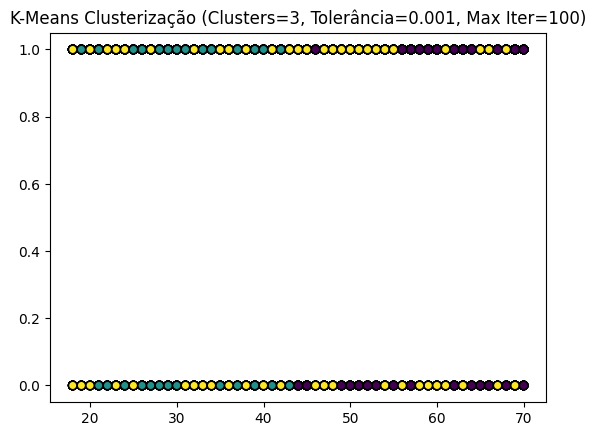

Silhouette Coefficient: 0.2075
Dunn Index: 1.7487
Calinski-Harabasz Index: 1264.0444


In [46]:

# Testes com diferentes valores de clusters, tolerância e max_iter
n_clusters = 3
tol =  1e-3
max_iter = 100

#for n_clusters in n_clusters_values:
    #for tol in tolerance_values:
        #for max_iter in max_iter_values:
           # print(f'\n--- Resultados para Clusters={n_clusters}, Tolerância={tol}, Max Iter={max_iter} ---')
silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_kmeans_and_metrics(X, n_clusters, tol, max_iter)
print(f'Silhouette Coefficient: {silhouette:.4f}')
print(f'Dunn Index: {dunn_index:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')

In [50]:
df_consumo['cluster'] = y_pred

In [52]:
df_consumo

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3,2
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3,1
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6,0
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6,1
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,9,1,28,45,0,21,2,4.2,0,0,0,0,32,5,6,2
3896,52,0,0,0,49,14,0,23,1,4.5,0,5,0,0,41,0,1,2
3897,46,0,1,0,33,29,0,8,1,2.9,0,4,0,0,24,5,5,2
3898,44,0,17,2,77,22,2,3,2,3.8,0,1,0,0,24,5,6,0
